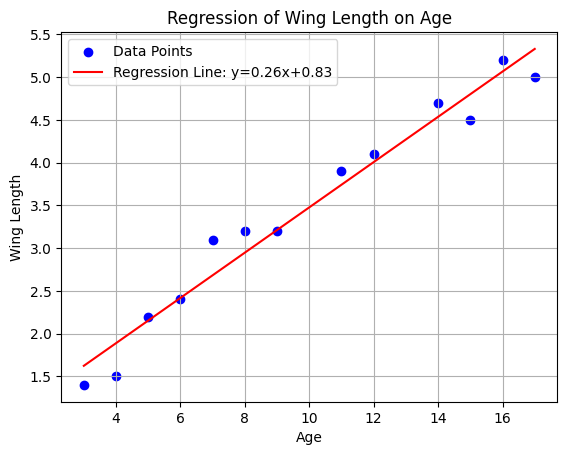

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Perform linear regression
slope, intercept = np.polyfit(age, wing_length, 1)
regression_line = slope * age + intercept

# Plot data
plt.scatter(age, wing_length, color='blue', label='Data Points')
plt.plot(age, regression_line, color='red', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')

# Labels and title
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression of Wing Length on Age")
plt.legend()
plt.grid(True)
plt.show()

Slope: 0.265
Intercept: 0.830
R-squared: 0.963
p-value: 3.010e-09


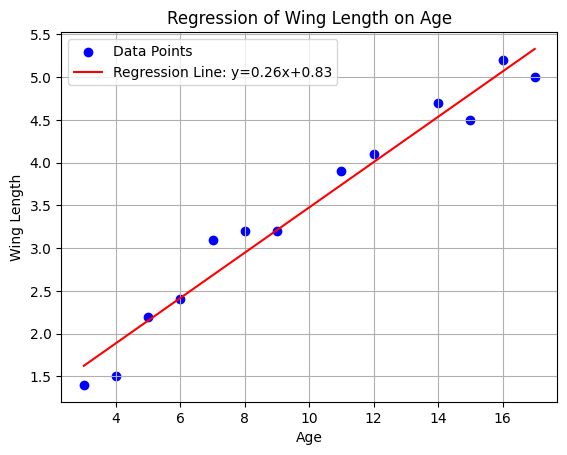

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(age, wing_length)

# Print regression results
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_value**2:.3f}")
print(f"p-value: {p_value:.3e}")

# Plot regression line
regression_line = slope * age + intercept
plt.scatter(age, wing_length, color='blue', label='Data Points')
plt.plot(age, regression_line, color='red', label=f'Regression Line: y={slope:.2f}x+{intercept:.2f}')
plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression of Wing Length on Age")
plt.legend()
plt.grid(True)
plt.show()

Slope: 0.265
95% CI for slope: (0.230, 0.299)
p-value: 3.010e-09


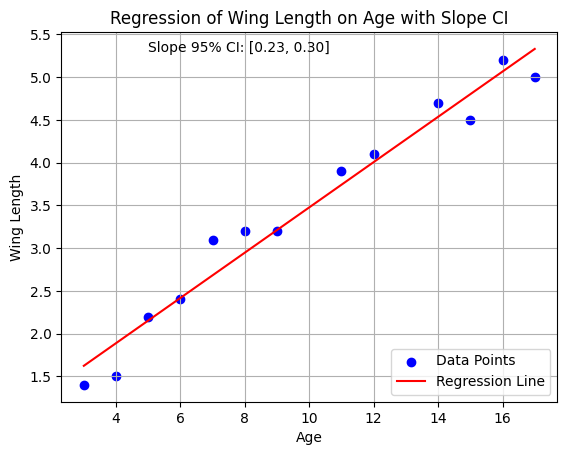

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Linear regression
slope, intercept, r_value, p_value, std_err = linregress(age, wing_length)

# Degrees of freedom
n = len(age)
df = n - 2

# t critical value for 95% CI
alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df)

# Confidence interval for slope
ci_low = slope - t_crit * std_err
ci_high = slope + t_crit * std_err

print(f"Slope: {slope:.3f}")
print(f"95% CI for slope: ({ci_low:.3f}, {ci_high:.3f})")
print(f"p-value: {p_value:.3e}")

# Regression line
regression_line = slope * age + intercept

# Plot data and regression line
plt.scatter(age, wing_length, color='blue', label='Data Points')
plt.plot(age, regression_line, color='red', label=f'Regression Line')

# Annotate CI on plot
plt.text(5, 5.3, f"Slope 95% CI: [{ci_low:.2f}, {ci_high:.2f}]", fontsize=10, color="black")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression of Wing Length on Age with Slope CI")
plt.legend()
plt.grid(True)
plt.show()


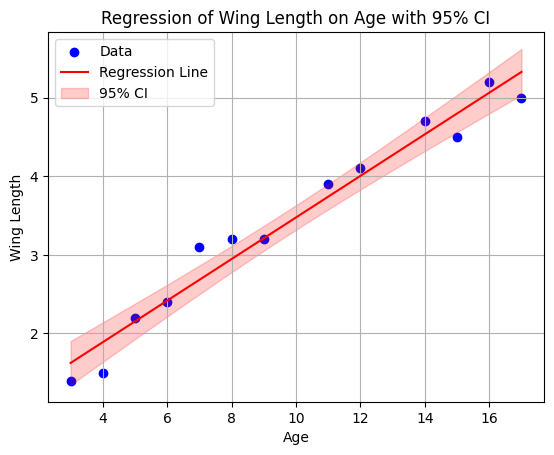

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, t

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Regression
slope, intercept, r_value, p_value, std_err = linregress(age, wing_length)

# Regression line
x_vals = np.linspace(min(age), max(age), 100)
y_pred = intercept + slope * x_vals

# Residuals
residuals = wing_length - (intercept + slope * age)
s_err = np.sqrt(np.sum(residuals**2) / (len(age) - 2))

# Confidence intervals for predictions
n = len(age)
mean_x = np.mean(age)
t_val = t.ppf(0.975, n - 2)  # 95% CI

conf = t_val * s_err * np.sqrt(1/n + (x_vals - mean_x)**2 / np.sum((age - mean_x)**2))

# Upper and lower CI bands
upper = y_pred + conf
lower = y_pred - conf

# Plot
plt.scatter(age, wing_length, color='blue', label="Data")
plt.plot(x_vals, y_pred, 'r', label="Regression Line")
plt.fill_between(x_vals, lower, upper, color='red', alpha=0.2, label="95% CI")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Regression of Wing Length on Age with 95% CI")
plt.legend()
plt.grid(True)
plt.show()


In [5]:
import numpy as np

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Fit regression line (slope and intercept)
slope, intercept = np.polyfit(age, wing_length, 1)

# Predicted values
y_pred = slope * age + intercept

# R² calculation
ss_res = np.sum((wing_length - y_pred) ** 2)   # residual sum of squares
ss_tot = np.sum((wing_length - np.mean(wing_length)) ** 2)  # total sum of squares
r_squared = 1 - (ss_res / ss_tot)

print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R-squared: {r_squared:.3f}")

Slope: 0.265
Intercept: 0.830
R-squared: 0.963


In [6]:
import numpy as np
from scipy.stats import pearsonr

# Data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Pearson's correlation
r, p_value = pearsonr(age, wing_length)

print(f"Pearson's r: {r:.3f}")
print(f"p-value: {p_value:.3e}")


Pearson's r: 0.982
p-value: 3.010e-09


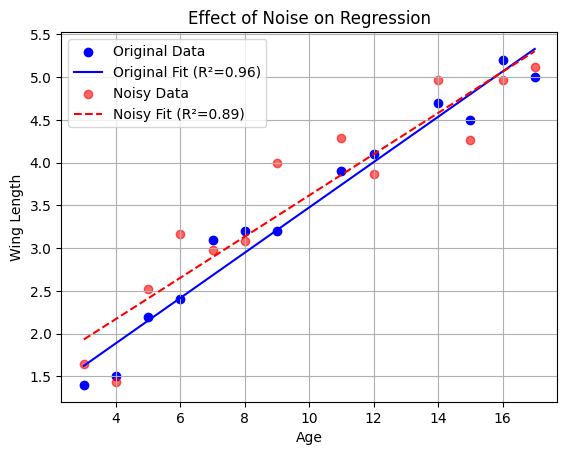

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Original data
age = np.array([3, 4, 5, 6, 7, 8, 9, 11, 12, 14, 15, 16, 17])
wing_length = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2, 3.9, 4.1, 4.7, 4.5, 5.2, 5.0])

# Add Gaussian noise to wing length
np.random.seed(42)  # reproducibility
noise = np.random.normal(0, 0.5, size=len(wing_length))  # mean=0, sd=0.5
wing_length_noisy = wing_length + noise

# Regression without noise
slope, intercept, r_value, p_value, std_err = linregress(age, wing_length)
y_pred = intercept + slope * age

# Regression with noise
slope_n, intercept_n, r_value_n, p_value_n, std_err_n = linregress(age, wing_length_noisy)
y_pred_noisy = intercept_n + slope_n * age

# Plot
plt.scatter(age, wing_length, color='blue', label="Original Data")
plt.plot(age, y_pred, 'b-', label=f"Original Fit (R²={r_value**2:.2f})")

plt.scatter(age, wing_length_noisy, color='red', alpha=0.6, label="Noisy Data")
plt.plot(age, y_pred_noisy, 'r--', label=f"Noisy Fit (R²={r_value_n**2:.2f})")

plt.xlabel("Age")
plt.ylabel("Wing Length")
plt.title("Effect of Noise on Regression")
plt.legend()
plt.grid(True)
plt.show()
